In [193]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [194]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [195]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [196]:
df_Germany=df[df['country']=='Germany']
df_Germany.head()


,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
12,13,Germany,Frankfurt,Townhouse,Fully-Furnished,5265,1578906,2005,4,2,...,64480,671215,30,8785,907691,0.07,3,7,2,0
32,33,Germany,Munich,Villa,Unfurnished,5631,1687549,1996,0,6,...,64905,769646,15,10925,917903,0.10,7,8,1,0
54,55,Germany,Munich,Villa,Fully-Furnished,5226,1569971,1991,0,4,...,21210,1002197,15,4340,567774,0.41,4,10,3,0
74,75,Germany,Berlin,Villa,Semi-Furnished,4885,1462368,2017,6,8,...,14770,1164638,10,10275,297730,0.90,3,2,3,0


#### We will remove irrelevant variables and avoid model cheating.

In [197]:
df_Germany=df_Germany.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [198]:
df_Germany.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
3,Germany,Farmhouse,Semi-Furnished,3714,1110959,2008,3,3,0,1
12,Germany,Townhouse,Fully-Furnished,5265,1578906,2005,2,2,0,1
32,Germany,Villa,Unfurnished,5631,1687549,1996,6,1,0,0
54,Germany,Villa,Fully-Furnished,5226,1569971,1991,4,1,0,1
74,Germany,Villa,Semi-Furnished,4885,1462368,2017,8,6,0,1


In [199]:
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15408 entries, 3 to 199995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15408 non-null  object
 1   property_type       15408 non-null  object
 2   furnishing_status   15408 non-null  object
 3   property_size_sqft  15408 non-null  int64 
 4   price               15408 non-null  int64 
 5   constructed_year    15408 non-null  int64 
 6   rooms               15408 non-null  int64 
 7   bathrooms           15408 non-null  int64 
 8   garage              15408 non-null  int64 
 9   garden              15408 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [200]:
df_Germany.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15408.000000,1.540800e+04,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000
mean,3193.730335,9.580933e+05,1991.152713,4.508762,2.750195,0.497404,0.496690
std,1610.342595,4.831174e+05,18.523603,2.274571,1.816955,0.500009,0.500005
min,400.000000,1.163210e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1802.750000,5.409688e+05,1975.000000,3.000000,1.000000,0.000000,0.000000
50%,3184.500000,9.549245e+05,1991.000000,5.000000,2.000000,0.000000,0.000000
75%,4565.000000,1.368940e+06,2007.000000,6.000000,4.000000,1.000000,1.000000
max,6000.000000,1.803663e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [201]:
df_Germany.value_counts()

country  property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Germany  Apartment      Fully-Furnished    438                 126484   1999              2      1          1       0         1
         Townhouse      Fully-Furnished    633                 194553   1989              5      5          0       1         1
         Studio         Unfurnished        5587                1680398  1961              4      1          0       0         1
                                           5596                1677692  1997              1      1          1       0         1
                                           5601                1678097  1995              3      2          0       0         1
                                                                                                                             ..
         Farmhouse      Unfurnished        5621                1683680  1986              7      7          1

In [202]:
df_Germany.value_counts()

country  property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Germany  Apartment      Fully-Furnished    438                 126484   1999              2      1          1       0         1
         Townhouse      Fully-Furnished    633                 194553   1989              5      5          0       1         1
         Studio         Unfurnished        5587                1680398  1961              4      1          0       0         1
                                           5596                1677692  1997              1      1          1       0         1
                                           5601                1678097  1995              3      2          0       0         1
                                                                                                                             ..
         Farmhouse      Unfurnished        5621                1683680  1986              7      7          1

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999982          0.000697 -0.013120   
price                         0.999982  1.000000          0.000561 -0.013129   
constructed_year              0.000697  0.000561          1.000000  0.008688   
rooms                        -0.013120 -0.013129          0.008688  1.000000   
bathrooms                    -0.009704 -0.009727          0.000233  0.620069   
garage                       -0.008058 -0.008057         -0.002133 -0.005430   
garden                        0.001924  0.001900          0.010296  0.000996   

                    bathrooms    garage    garden  
property_size_sqft  -0.009704 -0.008058  0.001924  
price               -0.009727 -0.008057  0.001900  
constructed_year     0.000233 -0.002133  0.010296  
rooms                0.620069 -0.005430  0.000996  
bathrooms            1.000000 -0.010609  0.004912  
garage              -0.010609  1.000000 -0.0048

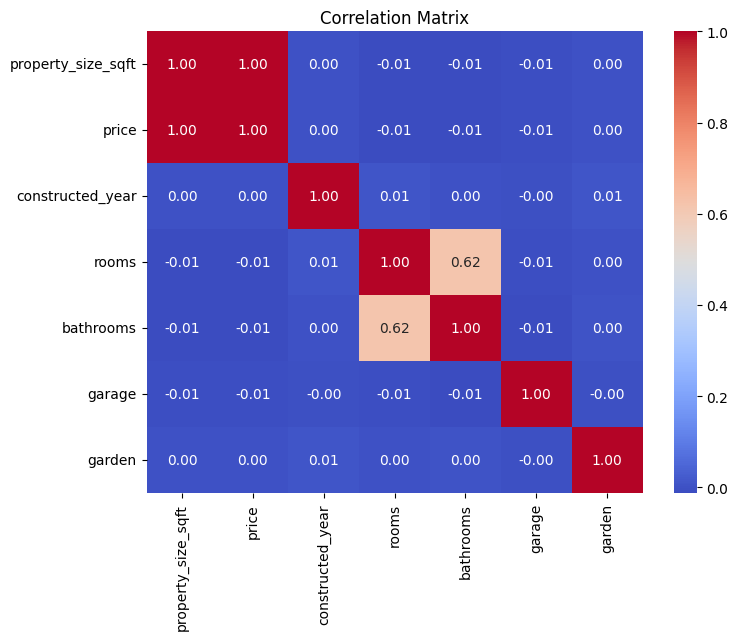

In [203]:
correlation_matrix = df_Germany.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [204]:
df_Germany=pd.get_dummies(df_Germany, columns=['property_type', 'furnishing_status'])
df_Germany.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
3,Germany,3714,1110959,2008,3,3,0,1,False,True,False,False,False,False,False,True,False
12,Germany,5265,1578906,2005,2,2,0,1,False,False,False,False,True,False,True,False,False
32,Germany,5631,1687549,1996,6,1,0,0,False,False,False,False,False,True,False,False,True
54,Germany,5226,1569971,1991,4,1,0,1,False,False,False,False,False,True,True,False,False
74,Germany,4885,1462368,2017,8,6,0,1,False,False,False,False,False,True,False,True,False


In [205]:
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15408 entries, 3 to 199995
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15408 non-null  object
 1   property_size_sqft                 15408 non-null  int64 
 2   price                              15408 non-null  int64 
 3   constructed_year                   15408 non-null  int64 
 4   rooms                              15408 non-null  int64 
 5   bathrooms                          15408 non-null  int64 
 6   garage                             15408 non-null  int64 
 7   garden                             15408 non-null  int64 
 8   property_type_Apartment            15408 non-null  bool  
 9   property_type_Farmhouse            15408 non-null  bool  
 10  property_type_Independent House    15408 non-null  bool  
 11  property_type_Studio               15408 non-null  bool  
 12  property

In [206]:
X=df_Germany.drop(['price', 'country'], axis=1)
y=df_Germany['price']

In [207]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [208]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999644001909967
Linier Regresion RMSE :  2893.556507246723


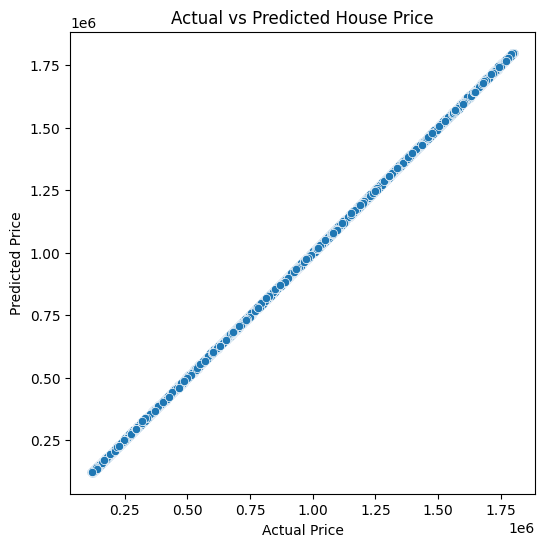

In [209]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [210]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree   R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree  RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree   R² :  0.9999247461906728
Decision Tree  RMSE :  4206.998705072015


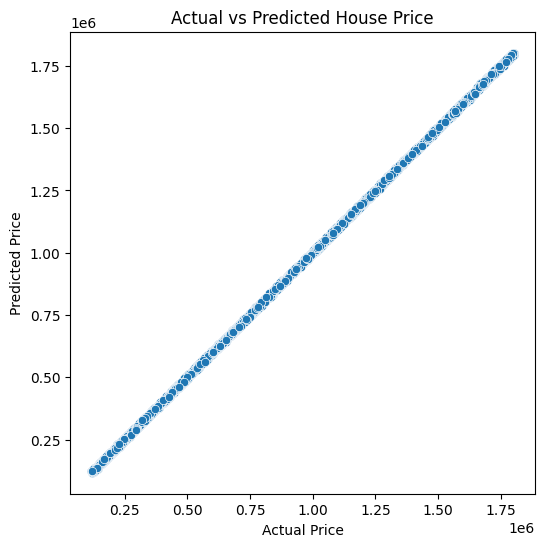

In [211]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [212]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999566760812523
Random Forest RMSE :  4206.998705072015


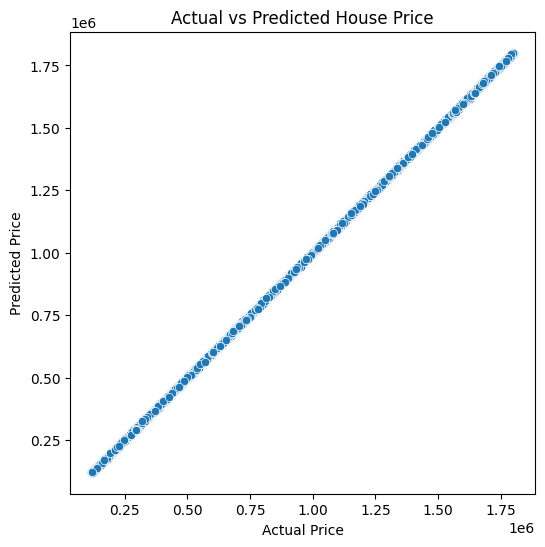

In [213]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualitation

In [214]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("LGradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

LGradient Boost  R² :  0.9999177194736195
Gradient Boost RMSE :  4206.998705072015


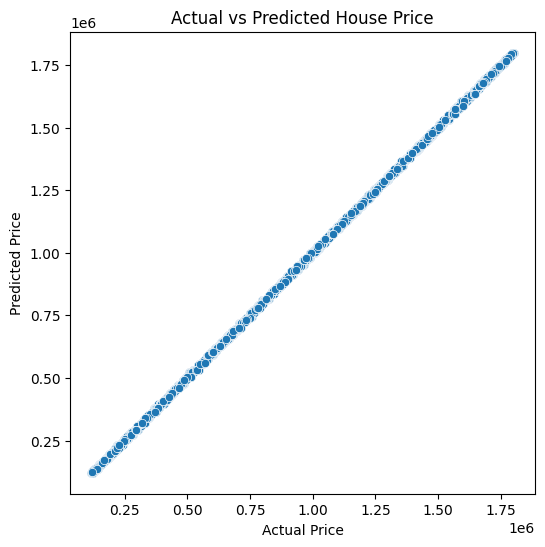

In [215]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [216]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [217]:
result

,metode,R²,RMSE
0,lr,0.999964,2893.556507
1,dt,0.999925,4206.998705
2,rf,0.999957,3192.067014
3,gb,0.999918,4399.027376
